In [1]:
import pandas as pd
import random
import csv
import numpy as np

In [2]:
project_dataset_dir = '/kaggle/input/emg-signal-for-gesture-recognition/EMG-data.csv'
df = pd.read_csv(project_dataset_dir)

FileNotFoundError: [Errno 2] No such file or directory: '/kaggle/input/emg-signal-for-gesture-recognition/EMG-data.csv'

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4237907 entries, 0 to 4237906
Data columns (total 11 columns):
 #   Column    Dtype  
---  ------    -----  
 0   time      int64  
 1   channel1  float64
 2   channel2  float64
 3   channel3  float64
 4   channel4  float64
 5   channel5  float64
 6   channel6  float64
 7   channel7  float64
 8   channel8  float64
 9   class     int64  
 10  label     int64  
dtypes: float64(8), int64(3)
memory usage: 355.7 MB


In [ ]:
df.drop('time', inplace=True, axis=1)

df.head()

,channel1,channel2,channel3,channel4,channel5,channel6,channel7,channel8,class,label
0,0.00001,-0.00002,-0.00001,-0.00003,0.00000,-0.00001,0.00000,-0.00001,0,1
1,0.00001,-0.00002,-0.00001,-0.00003,0.00000,-0.00001,0.00000,-0.00001,0,1
2,-0.00001,0.00001,0.00002,0.00000,0.00001,-0.00002,-0.00001,0.00001,0,1
3,-0.00001,0.00001,0.00002,0.00000,0.00001,-0.00002,-0.00001,0.00001,0,1
4,-0.00001,0.00001,0.00002,0.00000,0.00001,-0.00002,-0.00001,0.00001,0,1


In [ ]:
df.info()
len(df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4237907 entries, 0 to 4237906
Data columns (total 10 columns):
 #   Column    Dtype  
---  ------    -----  
 0   channel1  float64
 1   channel2  float64
 2   channel3  float64
 3   channel4  float64
 4   channel5  float64
 5   channel6  float64
 6   channel7  float64
 7   channel8  float64
 8   class     int64  
 9   label     int64  
dtypes: float64(8), int64(2)
memory usage: 323.3 MB


4237907

In [ ]:
df.isna().sum() # check null dataset

channel1    0
channel2    0
channel3    0
channel4    0
channel5    0
channel6    0
channel7    0
channel8    0
class       0
label       0
dtype: int64

In [ ]:
print(df['class'].value_counts())

class
0    2725157
6     253009
5     251733
4     251570
1     250055
3     249494
2     243193
7      13696
Name: count, dtype: int64


In [ ]:
df.drop(df[df['class'] == 0].index, inplace=True)

In [ ]:
df.head()

,channel1,channel2,channel3,channel4,channel5,channel6,channel7,channel8,class,label
2287,-0.00001,0.00000,-0.00001,0.00000,0.00000,-0.00001,-0.00001,0.00001,1,1
2288,-0.00001,-0.00002,0.00000,-0.00001,-0.00001,-0.00001,-0.00003,-0.00002,1,1
2289,-0.00001,-0.00002,0.00000,-0.00001,-0.00001,-0.00001,-0.00003,-0.00002,1,1
2290,-0.00001,-0.00002,0.00000,-0.00001,-0.00001,-0.00001,-0.00003,-0.00002,1,1
2291,-0.00001,-0.00002,0.00000,-0.00001,-0.00001,-0.00001,-0.00003,-0.00002,1,1


In [ ]:
all_labels_present = df.groupby('class')['label'].nunique() == 36
# use .unquniq() == 36 to check if all class have 36 unique label
all_labels_present

class
1     True
2     True
3     True
4     True
5     True
6     True
7    False
Name: label, dtype: bool

In [ ]:
# check how many label in class = 7
class_7_data = df[df['class'] == 7]
class_7_label_counts = class_7_data.groupby('label').size().reset_index(name='count')
class_7_label_counts

,label,count
0,11,7105
1,30,6591


In [ ]:
data = df[df['class'] != 7]

In [ ]:
data['class'].value_counts()

class
6    253009
5    251733
4    251570
1    250055
3    249494
2    243193
Name: count, dtype: int64

In [ ]:
subjects_data = data.groupby(['label','class'])

In [ ]:
import pandas as pd

# Assuming you have loaded your dataset into a DataFrame named df
class_counts = data.groupby('class').size().reset_index(name='count')

print('Class distribution:')
print(class_counts)

Class distribution:
   class   count
0      1  250055
1      2  243193
2      3  249494
3      4  251570
4      5  251733
5      6  253009


In [ ]:
data

,channel1,channel2,channel3,channel4,channel5,channel6,channel7,channel8,class,label
2287,-0.00001,0.00000,-0.00001,0.00000,0.00000,-0.00001,-0.00001,0.00001,1,1
2288,-0.00001,-0.00002,0.00000,-0.00001,-0.00001,-0.00001,-0.00003,-0.00002,1,1
2289,-0.00001,-0.00002,0.00000,-0.00001,-0.00001,-0.00001,-0.00003,-0.00002,1,1
2290,-0.00001,-0.00002,0.00000,-0.00001,-0.00001,-0.00001,-0.00003,-0.00002,1,1
2291,-0.00001,-0.00002,0.00000,-0.00001,-0.00001,-0.00001,-0.00003,-0.00002,1,1
...,...,...,...,...,...,...,...,...,...,...
4237207,0.00009,0.00001,0.00003,0.00001,-0.00003,-0.00008,0.00004,0.00000,6,36
4237208,0.00009,0.00001,0.00003,0.00001,-0.00003,-0.00008,0.00004,0.00000,6,36
4237209,0.00009,0.00001,0.00003,0.00001,-0.00003,-0.00008,0.00004,0.00000,6,36
4237210,0.00014,0.00003,-0.00001,0.00001,-0.00012,0.00006,-0.00007,-0.00013,6,36


In [ ]:
data.drop('label', inplace=True, axis=1)



/tmp/ipykernel_42/3018139218.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop('label', inplace=True, axis=1)


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1499054 entries, 2287 to 4237211
Data columns (total 9 columns):
 #   Column    Non-Null Count    Dtype  
---  ------    --------------    -----  
 0   channel1  1499054 non-null  float64
 1   channel2  1499054 non-null  float64
 2   channel3  1499054 non-null  float64
 3   channel4  1499054 non-null  float64
 4   channel5  1499054 non-null  float64
 5   channel6  1499054 non-null  float64
 6   channel7  1499054 non-null  float64
 7   channel8  1499054 non-null  float64
 8   class     1499054 non-null  int64  
dtypes: float64(8), int64(1)
memory usage: 114.4 MB


# ***NORMALIZE PROCESS***

In [ ]:
def normalized(data):
    min_value = np.min(data)
    max_value = np.max(data)
    normalized_data = (data - min_value) / (max_value - min_value)
    return normalized_data

# ***THE SLIDING WINDOW - CNN1***

In [ ]:
def sliding_window(data, window_size, stride):
    windowed_data = []
    labels = []

    for i in range(0, len(data) - window_size + 1, stride):
        windowed = data.iloc[i:i+window_size, :-1].values  # Exclude label column and convert to NumPy array
        label = data.iloc[i+window_size-1, -1]  # Use last column as label
        windowed_data.append(windowed)
        labels.append(label)

    return np.array(windowed_data), np.array(labels)

In [ ]:
window_size=150
stride=30
X, Y = sliding_window(data, 150, 30)

In [ ]:
X = normalized(X)

> Need to start the class from 0, because when you start class from 1, Keras accept [1,6) so the model does not work for class 6.

In [ ]:
Y = Y - 1

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense

def CNN_model(input_shape, num_classes):
    model = Sequential()

    # Convolutional layers
    model.add(Conv1D(32, kernel_size=3, activation='relu', input_shape=input_shape))
    model.add(MaxPooling1D(pool_size=2))

    model.add(Conv1D(64, kernel_size=3, activation='relu'))
    model.add(MaxPooling1D(pool_size=2))

    # Flattening layers
    model.add(Flatten())

    # Full connected layers
    model.add(Dense(128, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))

    # compile the model
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    model.summary()
    return model

In [ ]:
# define the CNN model
input_shape = X_train.shape[1:]  # set input size
num_classes = len(np.unique(Y))   # set class size

model = CNN_model(input_shape, num_classes)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 148, 32)           800       
                                                                 
 max_pooling1d (MaxPooling1  (None, 74, 32)            0         
 D)                                                              
                                                                 
 conv1d_1 (Conv1D)           (None, 72, 64)            6208      
                                                                 
 max_pooling1d_1 (MaxPoolin  (None, 36, 64)            0         
 g1D)                                                            
                                                                 
 flatten (Flatten)           (None, 2304)              0         
                                                                 
 dense (Dense)               (None, 128)               2

In [ ]:
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

Epoch 1/10
1250/1250 [==============================] - 14s 10ms/step - loss: 0.9899 - accuracy: 0.6065 - val_loss: 0.6985 - val_accuracy: 0.7416
Epoch 2/10
1250/1250 [==============================] - 12s 10ms/step - loss: 0.6598 - accuracy: 0.7524 - val_loss: 0.6145 - val_accuracy: 0.7691
Epoch 3/10
1250/1250 [==============================] - 13s 10ms/step - loss: 0.5757 - accuracy: 0.7829 - val_loss: 0.5420 - val_accuracy: 0.7995
Epoch 4/10
1250/1250 [==============================] - 12s 10ms/step - loss: 0.5087 - accuracy: 0.8069 - val_loss: 0.5147 - val_accuracy: 0.8061
Epoch 5/10
1250/1250 [==============================] - 13s 10ms/step - loss: 0.4709 - accuracy: 0.8219 - val_loss: 0.4899 - val_accuracy: 0.8132
Epoch 6/10
1250/1250 [==============================] - 13s 10ms/step - loss: 0.4465 - accuracy: 0.8305 - val_loss: 0.4642 - val_accuracy: 0.8282
Epoch 7/10
1250/1250 [==============================] - 13s 10ms/step - loss: 0.4118 - accuracy: 0.8435 - val_loss: 0.4523 -

In [ ]:
from sklearn.metrics import accuracy_score, f1_score

# make predictions on training data
y_pred_train = model.predict(X_train)
y_pred_train = np.argmax(y_pred_train, axis=1)  # Convert from one-hot encoding to labels

# make predictions on test data
y_pred_test = model.predict(X_test)
y_pred_test = np.argmax(y_pred_test, axis=1)  # Convert from one-hot encoding to labels

# calculate accuracy
accuracy_training = accuracy_score(y_train, y_pred_train)
accuracy_test = accuracy_score(y_test, y_pred_test)

# calculate F1 score
f1_training = f1_score(y_train, y_pred_train, average='weighted')
f1_test = f1_score(y_test, y_pred_test, average='weighted')

print("Training Accuracy:", accuracy_training)
print("Test Accuracy:", accuracy_test)
print("Training F1 Score:", f1_training)
print("Test F1 Score:", f1_test)

313/313 [==============================] - 1s 4ms/step
Training Accuracy: 0.8968251982687448
Test Accuracy: 0.8416891824276994
Training F1 Score: 0.8963983540009611
Test F1 Score: 0.8409685725081403


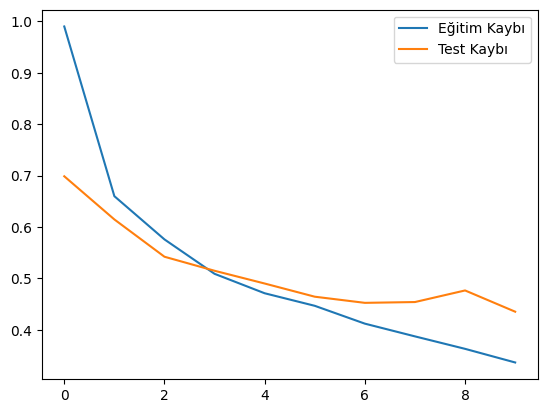

In [ ]:
import matplotlib.pyplot as plt

# training and testing loss graph
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.legend()
plt.show()

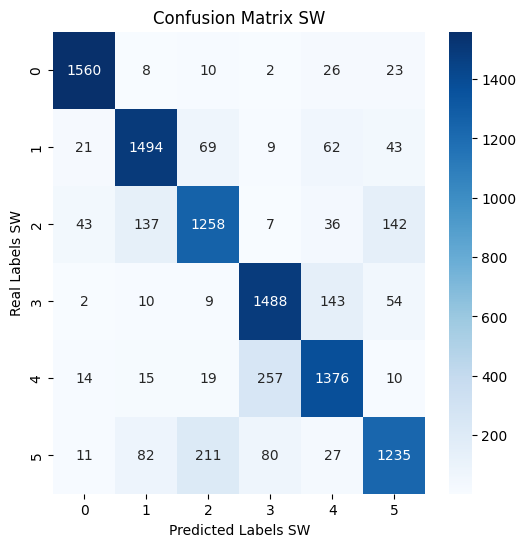

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test, y_pred_test)
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.title('Confusion Matrix SW')
plt.xlabel('Predicted Labels SW')
plt.ylabel('Real Labels SW')
plt.show()

In [ ]:
from sklearn.metrics import classification_report

# accuracy and F1 score of classes
rapor = classification_report(y_test, y_pred_test, target_names=[str(i) for i in np.unique(y_test)])
print(rapor)

              precision    recall  f1-score   support

           0       0.94      0.96      0.95      1629
           1       0.86      0.88      0.87      1698
           2       0.80      0.78      0.79      1623
           3       0.81      0.87      0.84      1706
           4       0.82      0.81      0.82      1691
           5       0.82      0.75      0.78      1646

    accuracy                           0.84      9993
   macro avg       0.84      0.84      0.84      9993
weighted avg       0.84      0.84      0.84      9993



# ***Root Mean Square (RMS) - CNN2***

In [ ]:
import numpy as np
from scipy.fft import fft
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense

def fourier_transform(X):
    transformed_data = []

    for item in X:
        transformed_item = []
        for channel in item.T:  # transpose the data and apply Fourier transform to each channel separately
            fft_values = fft(channel)
            transformed_item.append(np.abs(fft_values))  # only use amplitude information

        transformed_data.append(np.array(transformed_item))

    return np.array(transformed_data)

In [ ]:
# apply fourier transform
transformed_X = fourier_transform(X)

In [ ]:
transpoze_X = np.transpose(transformed_X, (0, 2, 1))

In [ ]:
# split the data into training and testing sets
X_train_ft, X_test_ft, y_train_ft, y_test_ft = train_test_split(transpoze_X, Y, test_size=0.2, random_state=42)

In [ ]:
# define CNN model
input_shape = X_train_ft.shape[1:]  # set input size
num_classes = len(np.unique(Y))   # set class size

model_ft = CNN_model(input_shape, num_classes)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_2 (Conv1D)           (None, 148, 32)           800       
                                                                 
 max_pooling1d_2 (MaxPoolin  (None, 74, 32)            0         
 g1D)                                                            
                                                                 
 conv1d_3 (Conv1D)           (None, 72, 64)            6208      
                                                                 
 max_pooling1d_3 (MaxPoolin  (None, 36, 64)            0         
 g1D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 2304)              0         
                                                                 
 dense_2 (Dense)             (None, 128)              

In [ ]:
history_ft = model_ft.fit(X_train_ft, y_train_ft, epochs=10, validation_data=(X_test_ft, y_test_ft))

Epoch 1/10
1250/1250 [==============================] - 13s 10ms/step - loss: 0.4810 - accuracy: 0.8260 - val_loss: 0.3846 - val_accuracy: 0.8600
Epoch 2/10
1250/1250 [==============================] - 13s 10ms/step - loss: 0.3568 - accuracy: 0.8715 - val_loss: 0.3399 - val_accuracy: 0.8777
Epoch 3/10
1250/1250 [==============================] - 13s 10ms/step - loss: 0.3157 - accuracy: 0.8862 - val_loss: 0.3069 - val_accuracy: 0.8920
Epoch 4/10
1250/1250 [==============================] - 13s 11ms/step - loss: 0.2867 - accuracy: 0.8977 - val_loss: 0.2880 - val_accuracy: 0.8981
Epoch 5/10
1250/1250 [==============================] - 13s 10ms/step - loss: 0.2559 - accuracy: 0.9074 - val_loss: 0.2991 - val_accuracy: 0.8949
Epoch 6/10
1250/1250 [==============================] - 12s 10ms/step - loss: 0.2246 - accuracy: 0.9189 - val_loss: 0.2721 - val_accuracy: 0.9041
Epoch 7/10
 702/1250 [===============>..............] - ETA: 5s - loss: 0.1929 - accuracy: 0.9310

In [ ]:
from sklearn.metrics import accuracy_score, f1_score

# make predictions on training data
y_pred_train_ft = model_ft.predict(X_train_ft)
y_pred_train_ft = np.argmax(y_pred_train_ft, axis=1)  # convert from one-hot encoding to tags

# make predictions on test data
y_pred_test_ft = model_ft.predict(X_test_ft)
y_pred_test_ft = np.argmax(y_pred_test_ft, axis=1)  # convert from one-hot encoding to tags

# calculate accuracy
accuracy_training_ft = accuracy_score(y_train_ft, y_pred_train_ft)
accuracy_test_ft= accuracy_score(y_test_ft, y_pred_test_ft)

# calculate F1 score
f1_training_ft = f1_score(y_train_ft, y_pred_train_ft, average='weighted')
f1_test_ft = f1_score(y_test_ft, y_pred_test_ft, average='weighted')

print("Eğitim Doğruluğu FT:", accuracy_training_ft)
print("Test Doğruluğu FT:", accuracy_test_ft)
print("Eğitim F1 Skoru FT:", f1_training_ft)
print("Test F1 Skoru FT:", f1_test_ft)

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm_ft = confusion_matrix(y_test, y_pred_test_ft)
plt.figure(figsize=(6, 6))
sns.heatmap(cm_ft, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.title('Confusion Matrix FT')
plt.xlabel('Predicted Labels FT')
plt.ylabel('Real Labels FT')
plt.show()

In [ ]:
from sklearn.metrics import classification_report

# accuracy and F1 score of classes
rapor_ft = classification_report(y_test, y_pred_test_ft, target_names=[str(i) for i in np.unique(y_test)])
print(rapor_ft)

# ***Root Mean Square (RMS) - CNN3***

In [ ]:
X.shape

In [ ]:
import numpy as np

# apply RMS
rms_data = np.sqrt(np.mean(np.square(X), axis=1))

In [ ]:
rms_data.shape

In [ ]:
# making data three-dimensional
rms_data = np.expand_dims(rms_data, axis=-1)

In [ ]:
rms_data.shape

In [ ]:
# check the shape
print("Original shape:", X.shape)
print("Shape After RMS Processing:", rms_data.shape)

In [ ]:
# split the data into trainig and test
X_train_rms, X_test_rms, y_train_rms, y_test_rms = train_test_split(rms_data, Y, test_size=0.2, random_state=42)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense

def CNN_model_rms(input_shape, num_classes):
    model = Sequential()

    # Convolutional Layers
    model.add(Conv1D(32, kernel_size=3, activation='relu', input_shape=input_shape))
    model.add(MaxPooling1D(pool_size=2))

    model.add(Conv1D(64, kernel_size=3, activation='relu'))
    model.add(MaxPooling1D(pool_size=1))

    # Flattening Layer
    model.add(Flatten())

    # Full Connected Layers
    model.add(Dense(128, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))

    # compile the model
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    model.summary()
    return model

In [ ]:
X_train_rms.shape

In [ ]:
# define CNN model
input_shape_rms = X_train_rms.shape[1:]  # set input size
num_classes_rms = len(np.unique(Y))   # set class size

model_rms = CNN_model_rms(input_shape_rms, num_classes_rms)

In [ ]:
history_rms = model_rms.fit(X_train_rms, y_train_rms, epochs=10, validation_data=(X_test_rms, y_test_rms))

In [ ]:
from sklearn.metrics import accuracy_score, f1_score

# Predict on training data
y_pred_train_rms = model_rms.predict(X_train_rms)
y_pred_train_rms = np.argmax(y_pred_train_rms, axis=1)  # Convert from one-hot encoding to labels

# Predict on test data
y_pred_test_rms = model_rms.predict(X_test_rms)
y_pred_test_rms = np.argmax(y_pred_test_rms, axis=1)  # Convert from one-hot encoding to labels

# calculate accuracy
accuracy_training_rms = accuracy_score(y_train_rms, y_pred_train_rms)
accuracy_test_rms = accuracy_score(y_test_rms, y_pred_test_rms)

# calculate F1 score
f1_training_rms = f1_score(y_train_rms, y_pred_train_rms, average='weighted')
f1_test_rms = f1_score(y_test_rms, y_pred_test_rms, average='weighted')

print("Training Accuracy RMS:", accuracy_training_rms)
print("Test Accuracy RMS:", accuracy_test_rms)
print("Training F1 Score RMS:", f1_training_rms)
print("Test F1 Score RMS:", f1_test_rms)

In [ ]:
from sklearn.metrics import classification_report

# accuracy and F1 score of classes
rapor_rms = classification_report(y_test, y_pred_test_rms, target_names=[str(i) for i in np.unique(y_test)])
print(rapor_rms)

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm_rms = confusion_matrix(y_test, y_pred_test_rms)
plt.figure(figsize=(6, 6))
sns.heatmap(cm_rms, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.title('Confusion Matrix RMS')
plt.xlabel('Predicted Labels RMS')
plt.ylabel('Real Labels RMS')
plt.show()